In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def imshow(image, title=None,size=5):
    imgType = image.shape
    plt.figure(figsize=(size,size))
    if len(imgType)>2:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'gray')
    else:
        plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

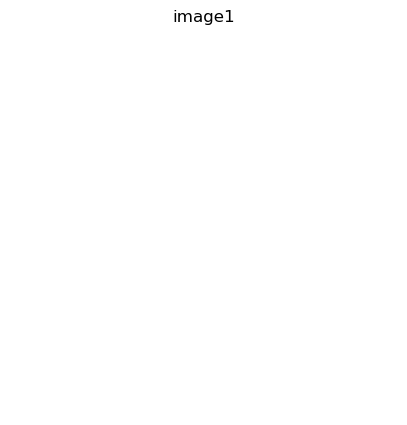

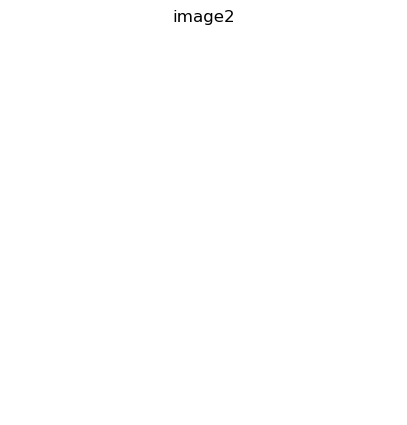

In [22]:
image = cv2.imread('./images/contours.jpg',0)
image2 = cv2.imread('./images/scan.jpg',0)
imshow(image, 'image1')
imshow(image2, 'image2')

In [23]:
orb = cv2.ORB_create()
kl1,des1 = orb.detectAndCompute(image, None)
kl2, des2 = orb.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x : x.distance)
matchingResult = cv2.drawMatches(image, kl1,image2,kl2, matches[:50], None, flags=2)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [24]:
cv2.imshow('ORB Features', matchingResult)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'matchingResult' is not defined

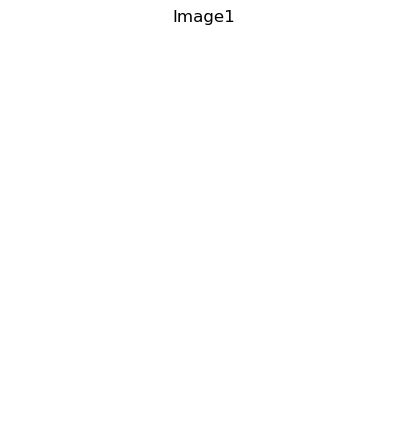

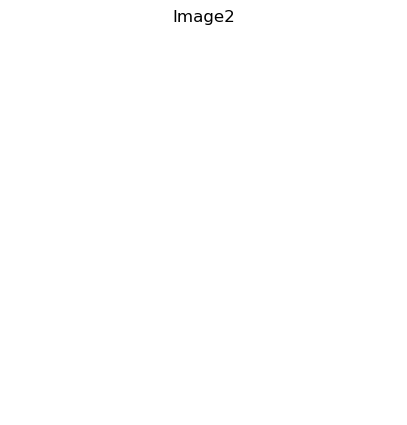

In [25]:
image1 = cv2.imread('./Effiel1.png', 0)
image2 = cv2.imread('./Effiel2.png', 0)
imshow(image1, 'Image1')
imshow(image2, 'Image2')
orb = cv2.ORB_create()
kl1,des1 = orb.detectAndCompute(image1, None)
kl2, des2 = orb.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x : x.distance)
matchingResult = cv2.drawMatches(image1, kl1,image2,kl2, matches[:50], None, flags=2)

In [9]:
cv2.imshow('ORB Features', matchingResult)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Scale Invariant Feature Transform (SIFT)


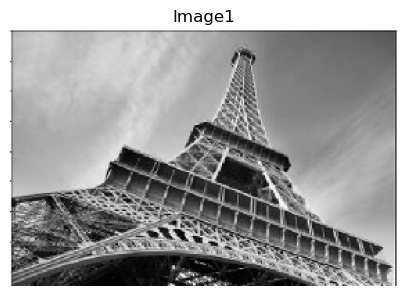

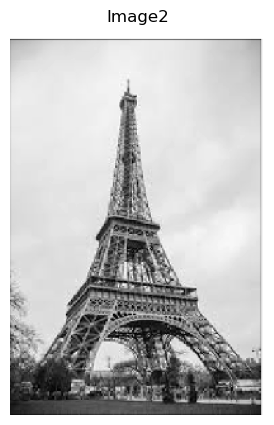

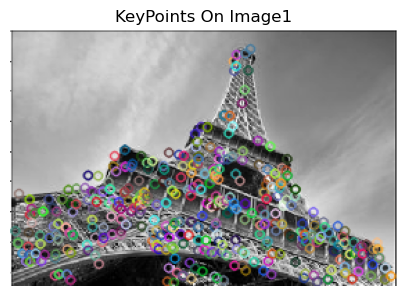

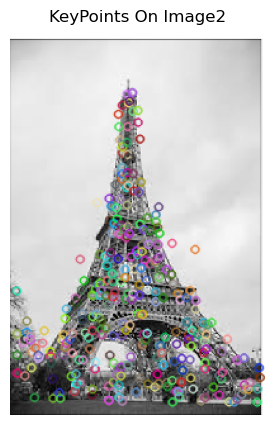

In [15]:
image1 = cv2.imread('./Effiel1.png', 0)
image2 = cv2.imread('./Effiel2.png', 0)
imshow(image1, 'Image1')
imshow(image2, 'Image2')
sift = cv2.SIFT_create() # OpenCV 4.x, the xfeatures2d module has been deprecated, and you need to use the cv2.SIFT_create() and cv2.SURF_create() functions directly.
keyPoints, descriptor = sift.detectAndCompute(image1, None)
resultImage1 = cv2.drawKeypoints(image1, keyPoints, None)
keyPoints, descriptor = sift.detectAndCompute(image2, None)
resultImage2 = cv2.drawKeypoints(image2, keyPoints, None)
imshow(resultImage1, 'KeyPoints On Image1')
imshow(resultImage2, 'KeyPoints On Image2')

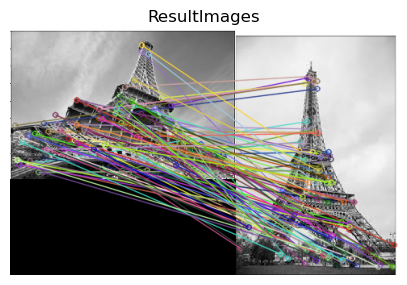

In [16]:
image1 = cv2.imread('./Effiel1.png',0)
image2 = cv2.imread('./Effiel2.png', 0)
sift = cv2.SIFT_create()
kp1, desc1 =sift.detectAndCompute(image1, None)
kp2, desc2 = sift.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(image1, kp1, image2, kp2, matches, None, flags=2)
imshow(result, 'ResultImages')

## Hough Transform

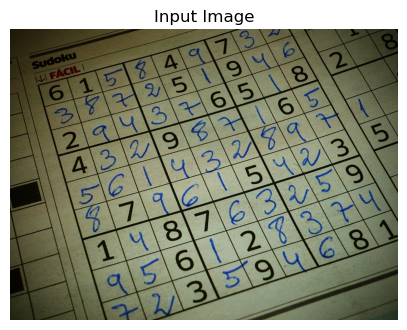

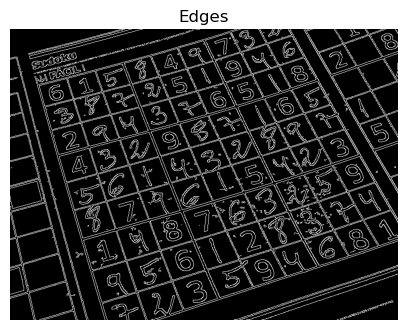

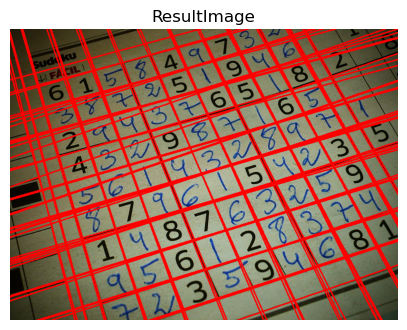

In [20]:
img = cv2.imread('./images/soduku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
imshow(img, 'Input Image')
imshow(edges, 'Edges')
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


imshow(img, 'ResultImage')

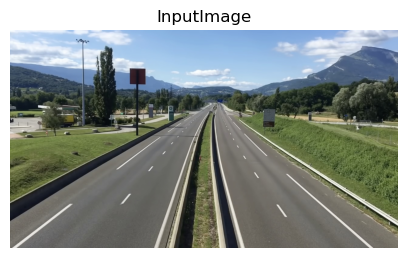

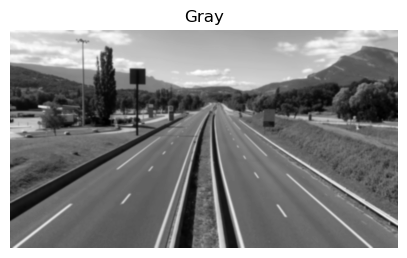

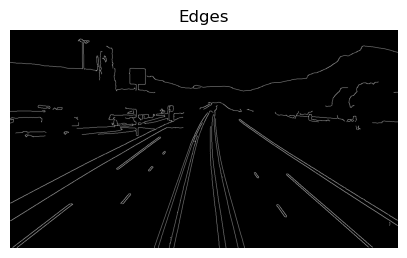

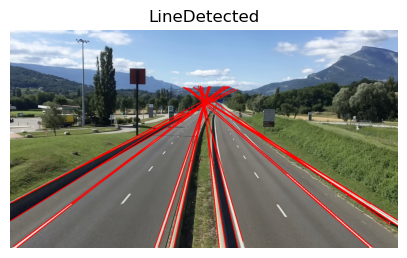

In [22]:
image = cv2.imread('./filtered_road.jpg')
imshow(image, 'InputImage')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 0)
imshow(gray, 'Gray')
edges = cv2.Canny(gray, 50, 200)
imshow(edges, 'Edges')
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold = 100, minLineLength=5, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    if (y1 > 400 or y2 > 400): #Filter out the lines in the top of the image
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
imshow(image, 'LineDetected')